## Hashfunktionen

Die wichtigste Komponente um einen Hashtabelle bauen zu können ist die Hashfunktion, welche uns für jedes Objekt einen Ganzzahligen Wert (den Hashwert) liefert. In Python berechnen wir dies mit der Funktion ```hash```. Für alle Standardtypen in Python ist die Hashfunktion bereits definiert.

In [66]:
print("Hashwert für String abc", hash("abc"))
print("Hashwert für Integer 7", hash(7))
print("Hashwert für Tuple (\"abc\", 7)", hash(("abc",7)))

Hashwert für String abc 5098958930821522730
Hashwert für Integer 7 7
Hashwert für Tuple ("abc", 7) -2566239809947742136


Sobald wir benutzerdefinierte Typen definieren, bei denen wir auch Gleichheit via der ```__eq__``` Methode definieren, müssen wir auch eine eigene Hashfunktion definieren.

In [7]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
    
    def __eq__(self, that):
        return self.year == that.year \
                and self.month == that.month \
                and self.day == that.day

In [68]:
hash(Date(19, 4, 2018))

TypeError: unhashable type: 'Date'

Dies geht ganz einfach indem wir die  Methode ```__hash___``` implementieren.

In [8]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
    
    def __eq__(self, that):
        return self.year == that.year \
                and self.month == that.month \
                and self.day == that.day
            
    def __hash__(self):
        return hash((self.day, self.month, self.year))
    
    def __str__(self):
        return str((self.day, self.month, self.year))

In [89]:
hash(Date(15,3,2011))

6105194727903540

### Modulares Hashing

Für die Implementation von Hashtabellen interessiert uns nicht der wirkliche Hashwert, sondern wir wollen eine Zahl zwischen $0$ und $M$ (wobei $M$ die Tabellengrösse ist), die wir als Arrayindex verwenden können. Wir definieren uns die Funktion ```modHash```.

In [9]:
import sys
def modHash(key, M):
        positiveHash = hash(key) % ((sys.maxsize + 1) * 2) 
        return positiveHash % M

Der Hashwert, der ja auch negativ sein kann, wird hier zuerst auf eine positiven Wert abgebildet und dann modulo $M$ gerechnet.  

### Gleichverteilung von Hashwerten

Eine gute Hashfunktion sollte die Werte etwa gleichverteilen. Wir können dies überpüfen, indem wir zufällige Objekte eines Typs generieren, und den modularen Hashwert plotten.

In [10]:
import random
def randomDate():
    return Date(random.randint(1, 31), random.randint(1, 12), random.randint(1900, 2018))

In [92]:
import matplotlib.pyplot as plt


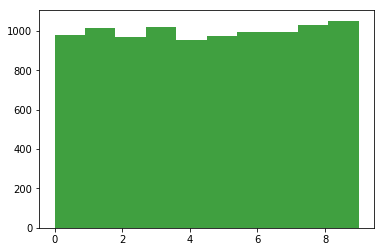

In [93]:
M = 10
hashes = [modHash(randomDate(), M) for _ in range(0, 10000)]
n, bins, patches = plt.hist(hashes, M, facecolor='green', alpha=0.75)
plt.show()

Wir sehen, dass die Schlüssel in diesem Fall gleichverteilt sind. 

#### Übung: 
*Was passiert wenn sie zur Hashberechnung die Tage auslassen?*

### Kollisionen

Bevor wir die Hashtabellen implementieren, schauen wir noch an, wie wahrscheinlich es ist, dass es zu Kollisionen kommt. 

#### Geburtstagsparadoxon

Das Geburtstagsparadoxon bezieht sich auf die Aussage, dass es auch bereits wenn die Anzahl Elemente $N$ im Vergleich zur Tabellengrösse $M$ noch klein ist, zu Kollisionen kommt. Beim klassischen Geburtstagsparadoxon ist $M=365$.
Wir simulieren dies, indem wir hashWerte für unsere zufälligen Datumsobjekte generieren, bis wir eine erste Kollision haben.

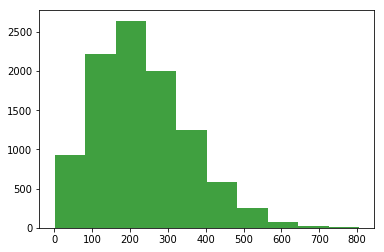

In [95]:
M=100000

numExperiments = 10000
earliestCollisionList = []
for i in range(0, numExperiments):
    hashesSeen = set()
    for numElements in range(0, M):
        newHash = modHash(randomDate(), M)
        if newHash in hashesSeen:
            earliestCollisionList.append(numElements)
            break
        else:
            hashesSeen.add(newHash)
            
n, bins, patches = plt.hist(earliestCollisionList, 10, facecolor='green', alpha=0.75)
plt.show()        

### Sammelbilderproblem

Beim Sammelbildproblem geht es darum zu sehen, wieviele Hashwerte (Bilder) wir generieren müssen, bevor wir jedes Bild der Kollektion (also Werte $1$-$M$) einmal gesehen haben. Auch dies können wir einfach simulieren.

In [97]:
M = 5000
numberOfHashesGenerated = 0
hashesSeen = set()
while len(hashesSeen) < M:
    r = random.randint(0, 1000000)
    newHash = modHash(r, M)
    if not newHash in hashesSeen:
        hashesSeen.add(newHash)
    numberOfHashesGenerated += 1
    
print("Anzahl Elemente gehasht bevor wir alle gesehen haben ", numberOfHashesGenerated)

Anzahl Elemente gehasht bevor wir alle gesehen haben  40898


Interessant ist auch zu sehen, wie häufig wir jeden Hash sehen, bevor wir alle einmal gesehen haben. 

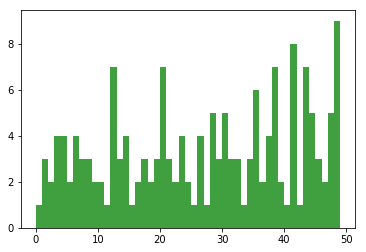

In [98]:
M = 50
hashes = []
hashesSeen = set()
while len(hashesSeen) < M:
    newHash = modHash(random.randint(0, 1000000), M)
    if not newHash in hashesSeen:
        hashesSeen.add(newHash)
    hashes.append(newHash)

            
n, bins, patches = plt.hist(hashes, max(hashes), facecolor='green', alpha=0.75)
plt.show()        

#### Übung:
* Implementieren Sie die ```delete``` Methode